# DCA0200 - LISTA 1 EXERCICIOS:


# Questão 1

## Questão 2



In [ ]:
!pip install pgmpy -q

In [ ]:
from IPython.display import Image
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD
import networkx as nx

In [ ]:
car_model = BayesianModel([
    ('B', 'T'),('T','S'),('F','S')
])

/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
cpd_b = TabularCPD(variable='B', variable_card=2, 
                   values=[[0.05], 
                           [0.95]], state_names={'B':['bad','good']}
                   )
print(cpd_b)

+---------+------+
| B(bad)  | 0.05 |
+---------+------+
| B(good) | 0.95 |
+---------+------+


In [ ]:
cdp_f = TabularCPD(variable='F', variable_card=2, 
                   values=[[0.9], 
                           [0.1]], state_names ={'F':['not_empty', 'empty']}
                   )
print(cdp_f)

+--------------+-----+
| F(not_empty) | 0.9 |
+--------------+-----+
| F(empty)     | 0.1 |
+--------------+-----+


In [ ]:
cdp_s = TabularCPD(variable= 'S', variable_card =2, values=[[1.0,0.01,0.99,0.92],
                                                            [0.0,0.99,0.01,0.08],
                                                            ], evidence=['F', 'T'] ,evidence_card=[2,2],
                   state_names={'S':['false','true'],'F':['not_empty', 'empty'], 'T':['false','true']}
                   )

In [ ]:
print(cdp_s)

+----------+--------------+--------------+----------+----------+
| F        | F(not_empty) | F(not_empty) | F(empty) | F(empty) |
+----------+--------------+--------------+----------+----------+
| T        | T(false)     | T(true)      | T(false) | T(true)  |
+----------+--------------+--------------+----------+----------+
| S(false) | 1.0          | 0.01         | 0.99     | 0.92     |
+----------+--------------+--------------+----------+----------+
| S(true)  | 0.0          | 0.99         | 0.01     | 0.08     |
+----------+--------------+--------------+----------+----------+


In [ ]:
#cdp_g = TabularCPD(variable = 'G', variable_card=2,values=)

In [ ]:
cdp_t =TabularCPD(variable = 'T', variable_card =2, values= [[0.96 , 0.1 ], [0.04, 0.9]], 
                  evidence=['B'], evidence_card=[2] , 
                  state_names = {'B':['bad','good'], 'T':['false','true']}
                                                                                      )

In [ ]:
print(cdp_t)

+----------+--------+---------+
| B        | B(bad) | B(good) |
+----------+--------+---------+
| T(false) | 0.96   | 0.1     |
+----------+--------+---------+
| T(true)  | 0.04   | 0.9     |
+----------+--------+---------+


In [ ]:
car_model.add_cpds(cpd_b, cdp_f, cdp_t , cdp_s)

In [ ]:
car_model.get_cpds()

[<TabularCPD representing P(B:2) at 0x7f13eb2dda90>,
 <TabularCPD representing P(F:2) at 0x7f13eb2f9640>,
 <TabularCPD representing P(T:2 | B:2) at 0x7f13eb2f9c10>,
 <TabularCPD representing P(S:2 | F:2, T:2) at 0x7f13eb2f9f10>]

In [ ]:
car_model.check_model()

True

In [ ]:
car_model.get_independencies()

(S ⟂ B | T)
(S ⟂ B | F, T)
(F ⟂ T, B)
(F ⟂ B | T)
(F ⟂ T | B)
(F ⟂ B | S, T)
(T ⟂ F)
(T ⟂ F | B)
(B ⟂ F)
(B ⟂ S, F | T)
(B ⟂ F | S, T)
(B ⟂ S | F, T)

In [ ]:
from pgmpy.inference import VariableElimination

car_model_infer = VariableElimination(car_model)

In [ ]:
q = car_model_infer.query(variables=["F"], evidence={"S":'false'})
print(q)

+--------------+----------+
| F            |   phi(F) |
+==============+==========+
| F(not_empty) |   0.5946 |
+--------------+----------+
| F(empty)     |   0.4054 |
+--------------+----------+


/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
q = car_model_infer.query(variables=["B"], evidence={"S":'false'})
print(q)

+---------+----------+
| B       |   phi(B) |
+=========+==========+
| B(bad)  |   0.2099 |
+---------+----------+
| B(good) |   0.7901 |
+---------+----------+


## Questão 3


In [ ]:
economy_model = BayesianModel([
    ('eh', 'oil'),('eh','rt'),('eh','inf'),('oil','inf'),('oil','bp'),('inf','rt')
])

/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
cpd_eh = TabularCPD(variable='eh', variable_card=2, 
                   values=[[0.7], 
                           [0.3]], state_names={'eh':['low','high']}
                   )
print(cpd_eh)

+----------+-----+
| eh(low)  | 0.7 |
+----------+-----+
| eh(high) | 0.3 |
+----------+-----+


In [ ]:
cdp_oil = TabularCPD(variable='oil',variable_card=2,values=[[0.9, 0.05]
                                                            ,[0.1,0.95]],
                     evidence=['eh'], evidence_card=[2] , 
                     state_names = {'eh':['low','high'], 'oil':['low','high']})
print(cdp_oil)

+-----------+---------+----------+
| eh        | eh(low) | eh(high) |
+-----------+---------+----------+
| oil(low)  | 0.9     | 0.05     |
+-----------+---------+----------+
| oil(high) | 0.1     | 0.95     |
+-----------+---------+----------+


In [ ]:
cdp_bp = TabularCPD(variable='bp',variable_card=3,values=[[0.1, 0.4]
                                                          ,[0.9,0.1],
                                                           [0.0,0.5]],
                     evidence=['oil'], evidence_card=[2] , 
                     state_names = {'bp':['normal','low','high'], 'oil':['low','high']})
print(cdp_bp)

+------------+----------+-----------+
| oil        | oil(low) | oil(high) |
+------------+----------+-----------+
| bp(normal) | 0.1      | 0.4       |
+------------+----------+-----------+
| bp(low)    | 0.9      | 0.1       |
+------------+----------+-----------+
| bp(high)   | 0.0      | 0.5       |
+------------+----------+-----------+


In [ ]:
cdp_inf = TabularCPD(variable='inf',variable_card=2,values=[[0.9,0.1,0.1,0.01]
                                                          ,[0.1,0.9,0.9,0.99]],
                     evidence=['oil','eh'], evidence_card=[2,2] , 
                     state_names = {'inf':['low','high'], 'oil':['low','high'],'eh':['low','high']})
print(cdp_inf)

+-----------+----------+----------+-----------+-----------+
| oil       | oil(low) | oil(low) | oil(high) | oil(high) |
+-----------+----------+----------+-----------+-----------+
| eh        | eh(low)  | eh(high) | eh(low)   | eh(high)  |
+-----------+----------+----------+-----------+-----------+
| inf(low)  | 0.9      | 0.1      | 0.1       | 0.01      |
+-----------+----------+----------+-----------+-----------+
| inf(high) | 0.1      | 0.9      | 0.9       | 0.99      |
+-----------+----------+----------+-----------+-----------+


In [ ]:
cdp_rf = TabularCPD(variable='rt',variable_card=2,values=[[0.9,0.1,0.1,0.01]
                                                          ,[0.1,0.9,0.9,0.99]],
                     evidence=['inf','eh'], evidence_card=[2,2] , 
                     state_names = {'inf':['low','high'], 'rt':['low','high'],'eh':['low','high']})
print(cdp_rf)

+----------+----------+----------+-----------+-----------+
| inf      | inf(low) | inf(low) | inf(high) | inf(high) |
+----------+----------+----------+-----------+-----------+
| eh       | eh(low)  | eh(high) | eh(low)   | eh(high)  |
+----------+----------+----------+-----------+-----------+
| rt(low)  | 0.9      | 0.1      | 0.1       | 0.01      |
+----------+----------+----------+-----------+-----------+
| rt(high) | 0.1      | 0.9      | 0.9       | 0.99      |
+----------+----------+----------+-----------+-----------+


In [ ]:
economy_model.add_cpds(cpd_eh,cdp_oil,cdp_bp,cdp_inf,cdp_rf)

In [ ]:
economy_model.get_cpds()

[<TabularCPD representing P(eh:2) at 0x7fc8c41cb460>,
 <TabularCPD representing P(oil:2 | eh:2) at 0x7fc8c1a2ce20>,
 <TabularCPD representing P(bp:3 | oil:2) at 0x7fc8c1a33a90>,
 <TabularCPD representing P(inf:2 | oil:2, eh:2) at 0x7fc8c1994a90>,
 <TabularCPD representing P(rt:2 | inf:2, eh:2) at 0x7fc8c1a338b0>]

In [ ]:
economy_model.check_model()

True

In [ ]:
from pgmpy.inference import VariableElimination

economy_model_infer = VariableElimination(economy_model)

In [ ]:
r = economy_model_infer.query(variables=["inf"], evidence={"bp":'normal',"rt":"high"})
print(r)

+-----------+------------+
| inf       |   phi(inf) |
+===========+============+
| inf(low)  |     0.0479 |
+-----------+------------+
| inf(high) |     0.9521 |
+-----------+------------+


/usr/local/lib/python3.9/dist-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [ ]:
economy_model.get_independencies()

(oil ⟂ rt | inf, eh)
(oil ⟂ rt | inf, eh, bp)
(inf ⟂ bp | oil)
(inf ⟂ bp | eh, oil)
(inf ⟂ bp | oil, rt)
(inf ⟂ bp | oil, eh, rt)
(eh ⟂ bp | oil)
(eh ⟂ bp | inf, oil)
(eh ⟂ bp | oil, rt)
(eh ⟂ bp | inf, oil, rt)
(rt ⟂ bp | oil)
(rt ⟂ bp, oil | inf, eh)
(rt ⟂ bp | inf, oil)
(rt ⟂ bp | eh, oil)
(rt ⟂ oil | inf, eh, bp)
(rt ⟂ bp | inf, eh, oil)
(bp ⟂ inf, eh, rt | oil)
(bp ⟂ rt | inf, eh)
(bp ⟂ eh, rt | inf, oil)
(bp ⟂ inf, rt | eh, oil)
(bp ⟂ inf, eh | oil, rt)
(bp ⟂ rt | inf, eh, oil)
(bp ⟂ eh | inf, oil, rt)
(bp ⟂ inf | oil, eh, rt)

# Trabalho 01


In [ ]:
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 32.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 83.3 MB/s eta 0:0

In [ ]:
import pandas as pd
import re
import string

import spacy

from tqdm.auto import tqdm
import time
# The data set
# https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset


## Data Loading

In [ ]:
fake_news = pd.read_csv("/content/Fake.csv.zip")
true_news = pd.read_csv("/content/True.csv.zip")

In [ ]:
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


# EDA

In [ ]:
fake_news.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
fake_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_news.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake_news.duplicated().sum()


3

In [ ]:
fake_news.drop_duplicates(inplace=True)

In [ ]:
true_news.duplicated().sum()

206

In [ ]:
true_news.drop_duplicates(inplace=True)

In [ ]:
fake_news['is_fake'] = 1
true_news['is_fake'] = 0

# combine the two datasets
news = pd.concat([fake_news, true_news], ignore_index=True)

news.drop(['date', 'subject'], axis = 1, inplace = True)



In [ ]:
news

,title,text,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
44684,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,0
44685,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",0
44686,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,0
44687,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,0


# Preprocessing the Text Data

In [ ]:
spacy.require_gpu()
nlp = spacy.load('en_core_web_sm')

# Define stop words
stop_words = spacy.lang.en.stop_words.STOP_WORDS

def preprocess_text(text):
    # Parse the text with Spacy
    doc = nlp(text)
    
    # Lemmatize the tokens and remove stop words
    lemmas = [token.lemma_.lower() for token in doc if not token.is_stop]
    
    # Join the lemmas back into a string and return it
    return " ".join(lemmas)
%time

tqdm.pandas()

news['text'] = news['text'].progress_apply(preprocess_text)



CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.72 µs


  0%|          | 0/44689 [00:00<?, ?it/s]

In [ ]:
news.head()

,title,text,is_fake
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump couldn t wish americans happy new...,1
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"friday , reveal milwaukee sheriff david clarke...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"christmas day , donald trump announce work ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis annual christmas day message rebu...,1


# Split dataset

In [ ]:
from sklearn.model_selection import train_test_split

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(news['text'], news['is_fake'], test_size=0.2, random_state=42)

# Vectorize text


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# create bag-of-words features
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)
vectorizer.get_feature_names_out()


array(['00', '000', '0000', ..., 'zzzzzzzz', 'zzzzzzzzzzzzz', 'émigré'],
      dtype=object)

In [ ]:
clf = MultinomialNB()
clf

MultinomialNB()

In [ ]:
clf.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
y_pred = clf.predict(X_test_vect)

In [ ]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9531215036921011


In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4007  193]
 [ 226 4512]]


<Axes: >

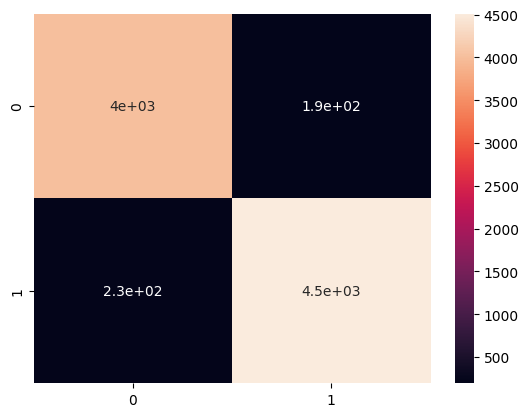

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True)

# Trabalho 2


In [ ]:

import numpy as np 
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
